<a href="https://colab.research.google.com/github/July-to-me/Smart_Lights_ML_Data_Analysis/blob/main/Smart_lights_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import calendar
import datetime, time
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

I would like to restart my code due to having a hard time setting up a new csv file with 111 blocks 
    I assume it is because some variables were int and str 
            As well as complying over 7gbs of data into one csv file
                it took way too long to do 

In [ ]:
## This is in order to find randomly select the blocks for our analysis

option1, option2, option3, option4, option5 = random.sample(range(0, 111), 5)

print(option1, option2, option3, option4, option5)


## We select block104, block76, block21, block8, block37

104 76 21 8 37


In [ ]:
## Creating file names into list and then making them into one table

## file_names = ['block_104.csv', 'block_76.csv', 'block_21.csv', 'block_8.csv', 'block_37.csv']

## data_all = pd.concat((pd.read_csv(i) for i in file_names)).reset_index(drop = True)

## print(data_all)

## The complied 110 blocks datasset had 7 million rows x 3 columns

## Creating their own dataframes
block_104_data = pd.read_csv("block_104.csv")

block_76_data = pd.read_csv("block_76.csv")

block_21_data = pd.read_csv("block_21.csv")

block_8_data = pd.read_csv("block_8.csv")

block_37_data = pd.read_csv("block_37.csv")

print(block_76_data) ## If it works for one. It works for all

FileNotFoundError: [Errno 2] File block_104.csv does not exist: 'block_104.csv'

In [ ]:
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

 Before implenting the drop NA to mode, I want to see the Missingno map to see the values that are na

 msno.matrix(data_all) - was going to demonstrate the missing values
 
 Unfortuately, I was not able to import missingno as msno

In [ ]:
## Originally, I wanted to eliminate all of the NA and turn them into zeros.
    ## But having the mode value seemed to be the better option as the graphs are constant 
            ## and it would seem weird if there is a 0 in the values as people inside will still need power
block_104_data = block_104_data.replace('Null', np.NaN)
replace = block_104_data.fillna(block_104_data.mode().iloc[0], inplace=True)

block_76_data = block_76_data.replace('Null', np.NaN)
replace = block_76_data.fillna(block_76_data.mode().iloc[0], inplace=True)

block_21_data = block_21_data.replace('Null', np.NaN)
replace = block_21_data.fillna(block_21_data.mode().iloc[0], inplace=True)

block_8_data = block_8_data.replace('Null', np.NaN)
replace = block_8_data.fillna(block_8_data.mode().iloc[0], inplace=True)

block_37_data = block_37_data.replace('Null', np.NaN)
replace = block_37_data.fillna(block_37_data.mode().iloc[0], inplace=True)

In [ ]:
## We print the dtypes command in order to see what kind of classification we are dealing with
    ## We will now change the variables to what we see fit

print(block_104_data.dtypes)

LCLid             object
tstp              object
energy(kWh/hh)    object
dtype: object


## Now we convert energy to float64

In [ ]:
block_104_data['energy(kWh/hh)'] = pd.to_numeric(block_104_data['energy(kWh/hh)'], errors='coerce')

block_76_data['energy(kWh/hh)'] = pd.to_numeric(block_76_data['energy(kWh/hh)'], errors='coerce')

block_21_data['energy(kWh/hh)'] = pd.to_numeric(block_21_data['energy(kWh/hh)'], errors='coerce')

block_8_data['energy(kWh/hh)'] = pd.to_numeric(block_8_data['energy(kWh/hh)'], errors='coerce')

block_37_data['energy(kWh/hh)'] = pd.to_numeric(block_37_data['energy(kWh/hh)'], errors='coerce')

print(block_37_data.dtypes)

LCLid              object
tstp               object
energy(kWh/hh)    float64
dtype: object


## We choose 1 household for each sampled blocks 

## As there is too many households in one

In [ ]:
block_104_house = print('Block 104 household ID:', block_104_data.LCLid.unique()[:1])

block_76_house = print('Block 76 household ID:', block_76_data.LCLid.unique()[:1])

block_21_house = print('Block 21 household ID:', block_21_data.LCLid.unique()[:1])

block_8_house = print('Block 8 household ID:', block_8_data.LCLid.unique()[:1])

block_37_house = print('Block 37 household ID:', block_37_data.LCLid.unique()[:1])


Block 104 household ID: ['MAC000090']
Block 76 household ID: ['MAC000019']
Block 21 household ID: ['MAC000138']
Block 8 household ID: ['MAC000079']
Block 37 household ID: ['MAC000021']


In [ ]:
house104 = "MAC000090"
house76 = "MAC000019"
house21 = "MAC000138"
house8 = "MAC000079"
house37 = "MAC000021"

## This will help us seperate make a new dataframe for each household

## I am doing this as there is too many household data to compile

In [ ]:
df104 = block_104_data[block_104_data["LCLid"] == house104]
df104.reset_index(drop=True, inplace=True)
print(df104.head())
print(df104.dtypes) ## Worked on all of them!

       LCLid                         tstp  energy(kWh/hh)
0  MAC000090  2011-12-12 10:00:00.0000000           0.247
1  MAC000090  2011-12-12 10:30:00.0000000           0.068
2  MAC000090  2011-12-12 11:00:00.0000000           0.107
3  MAC000090  2011-12-12 11:30:00.0000000           0.098
4  MAC000090  2011-12-12 12:00:00.0000000           0.095
LCLid              object
tstp               object
energy(kWh/hh)    float64
dtype: object


In [ ]:
df76 = block_76_data[block_76_data["LCLid"] == house76]
df76.reset_index(drop=True, inplace=True)

In [ ]:
df21 = block_21_data[block_21_data["LCLid"] == house21]
df21.reset_index(drop=True, inplace=True)

In [ ]:
df37 = block_37_data[block_37_data["LCLid"] == house37]
df37.reset_index(drop=True, inplace=True)

In [ ]:
df8 = block_8_data[block_8_data["LCLid"] == house8]
df8.reset_index(drop=True, inplace=True)

## Now we want to change the timestamps into actual time for the computer to understand 

In [ ]:
## df104['tstp'] = pd.to_datetime(df104['tstp'], format='%Y-%m-%d %H:%M:%S')
    ## Not sure why this does not work

In [ ]:
for i in range(df37.shape[0]):
    df37.loc[i,'datetime'] = datetime.datetime.strptime(df37.loc[i,'tstp'].replace('.0000000', ''), '%Y-%m-%d %H:%M:%S')
    df37.loc[i,'date'] = df37.loc[i,'datetime'].date()
    df37.loc[i,'month'] = df37.loc[i,'datetime'].strftime("%B")
    df37.loc[i,'day_of_month'] = df37.loc[i,'datetime'].strftime("%d")
    df37.loc[i,'time'] = df37.loc[i,'datetime'].strftime('%X')
    df37.loc[i,'weekday'] = df37.loc[i,'datetime'].strftime('%A')
    time = df37.datetime[i] - datetime.datetime.combine(df37.date[i], datetime.datetime.min.time())

In [ ]:
for i in range(df8.shape[0]):
    df8.loc[i,'datetime'] = datetime.datetime.strptime(df8.loc[i,'tstp'].replace('.0000000', ''), '%Y-%m-%d %H:%M:%S')
    df8.loc[i,'date'] = df8.loc[i,'datetime'].date()
    df8.loc[i,'month'] = df8.loc[i,'datetime'].strftime("%B")
    df8.loc[i,'day_of_month'] = df8.loc[i,'datetime'].strftime("%d")
    df8.loc[i,'time'] = df8.loc[i,'datetime'].strftime('%X')
    df8.loc[i,'weekday'] = df8.loc[i,'datetime'].strftime('%A')
    time = df8.datetime[i] - datetime.datetime.combine(df8.date[i], datetime.datetime.min.time())

In [ ]:
for i in range(df21.shape[0]):
    df21.loc[i,'datetime'] = datetime.datetime.strptime(df21.loc[i,'tstp'].replace('.0000000', ''), '%Y-%m-%d %H:%M:%S')
    df21.loc[i,'date'] = df21.loc[i,'datetime'].date()
    df21.loc[i,'month'] = df21.loc[i,'datetime'].strftime("%B")
    df21.loc[i,'day_of_month'] = df21.loc[i,'datetime'].strftime("%d")
    df21.loc[i,'time'] = df21.loc[i,'datetime'].strftime('%X')
    df21.loc[i,'weekday'] = df21.loc[i,'datetime'].strftime('%A')
    time = df21.datetime[i] - datetime.datetime.combine(df21.date[i], datetime.datetime.min.time())

In [ ]:
for i in range(df76.shape[0]):
    df76.loc[i,'datetime'] = datetime.datetime.strptime(df76.loc[i,'tstp'].replace('.0000000', ''), '%Y-%m-%d %H:%M:%S')
    df76.loc[i,'date'] = df76.loc[i,'datetime'].date()
    df76.loc[i,'month'] = df76.loc[i,'datetime'].strftime("%B")
    df76.loc[i,'day_of_month'] = df76.loc[i,'datetime'].strftime("%d")
    df76.loc[i,'time'] = df76.loc[i,'datetime'].strftime('%X')
    df76.loc[i,'weekday'] = df76.loc[i,'datetime'].strftime('%A')
    time = df76.datetime[i] - datetime.datetime.combine(df76.date[i], datetime.datetime.min.time())

In [ ]:
for i in range(df104.shape[0]):
    df104.loc[i,'datetime'] = datetime.datetime.strptime(df104.loc[i,'tstp'].replace('.0000000', ''), '%Y-%m-%d %H:%M:%S')
    df104.loc[i,'date'] = df104.loc[i,'datetime'].date()
    df104.loc[i,'month'] = df104.loc[i,'datetime'].strftime("%B")
    df104.loc[i,'day_of_month'] = df104.loc[i,'datetime'].strftime("%d")
    df104.loc[i,'time'] = df104.loc[i,'datetime'].strftime('%X')
    df104.loc[i,'weekday'] = df104.loc[i,'datetime'].strftime('%A')
    time = df104.datetime[i] - datetime.datetime.combine(df104.date[i], datetime.datetime.min.time())

## Seeing if we can organize data

In [ ]:
df104.loc[:,'weekday'] = pd.Categorical(df104['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df104.loc[:,'month'] = pd.Categorical(df104['month'], categories=calendar.month_name[1:], ordered=True)

In [ ]:
df76.loc[:,'weekday'] = pd.Categorical(df76['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df76.loc[:,'month'] = pd.Categorical(df76['month'], categories=calendar.month_name[1:], ordered=True)

In [ ]:
df21.loc[:,'weekday'] = pd.Categorical(df21['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df21.loc[:,'month'] = pd.Categorical(df21['month'], categories=calendar.month_name[1:], ordered=True)

In [ ]:
df8.loc[:,'weekday'] = pd.Categorical(df8['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df8.loc[:,'month'] = pd.Categorical(df8['month'], categories=calendar.month_name[1:], ordered=True)

In [ ]:
df37.loc[:,'weekday'] = pd.Categorical(df37['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df37.loc[:,'month'] = pd.Categorical(df37['month'], categories=calendar.month_name[1:], ordered=True)

## What days/half-hour did they use the most electricity?

In [ ]:
df8.loc[df8['energy(kWh/hh)'].idxmax()]

LCLid                               MAC000079
tstp              2012-11-12 18:00:00.0000000
energy(kWh/hh)                           4.13
datetime                  2012-11-12 18:00:00
date                               2012-11-12
month                                November
day_of_month                               12
time                                 18:00:00
weekday                                Monday
day_seconds                             64800
Name: 15947, dtype: object

In [ ]:
df104.loc[df104['energy(kWh/hh)'].idxmax()]

LCLid                               MAC000090
tstp              2012-02-11 07:00:00.0000000
energy(kWh/hh)                          2.628
datetime                  2012-02-11 07:00:00
date                               2012-02-11
month                                February
day_of_month                               11
time                                 07:00:00
weekday                              Saturday
day_seconds                             25200
Name: 2922, dtype: object

In [ ]:
df21.loc[df21['energy(kWh/hh)'].idxmax()]

LCLid                               MAC000138
tstp              2013-02-16 13:00:00.0000000
energy(kWh/hh)                          4.323
datetime                  2013-02-16 13:00:00
date                               2013-02-16
month                                February
day_of_month                               16
time                                 13:00:00
weekday                              Saturday
day_seconds                             46800
Name: 20589, dtype: object

In [ ]:
df76.loc[df76['energy(kWh/hh)'].idxmax()]

LCLid                               MAC000019
tstp              2013-03-12 16:30:00.0000000
energy(kWh/hh)                          1.641
datetime                  2013-03-12 16:30:00
date                               2013-03-12
month                                   March
day_of_month                               12
time                                 16:30:00
weekday                               Tuesday
day_seconds                             59400
Name: 22132, dtype: object

In [ ]:
df37.loc[df37['energy(kWh/hh)'].idxmax()]

LCLid                               MAC000021
tstp              2012-02-08 18:00:00.0000000
energy(kWh/hh)                          2.808
datetime                  2012-02-08 18:00:00
date                               2012-02-08
month                                February
day_of_month                               08
time                                 18:00:00
weekday                             Wednesday
day_seconds                             64800
Name: 3040, dtype: object

## What days/half-hour did they use the least amount of electricity?

In [ ]:
df8.loc[df8['energy(kWh/hh)'].idxmin()]

LCLid                               MAC000079
tstp              2012-12-18 15:13:47.0000000
energy(kWh/hh)                          0.062
datetime                  2012-12-18 15:13:47
date                               2012-12-18
month                                December
day_of_month                               18
time                                 15:13:47
weekday                               Tuesday
day_seconds                             54827
Name: 17670, dtype: object

In [ ]:
df104.loc[df104['energy(kWh/hh)'].idxmin()]

LCLid                               MAC000090
tstp              2013-09-24 13:30:00.0000000
energy(kWh/hh)                          0.011
datetime                  2013-09-24 13:30:00
date                               2013-09-24
month                               September
day_of_month                               24
time                                 13:30:00
weekday                               Tuesday
day_seconds                             48600
Name: 31299, dtype: object

In [ ]:
df21.loc[df21['energy(kWh/hh)'].idxmin()]

LCLid                               MAC000138
tstp              2011-12-15 14:30:00.0000000
energy(kWh/hh)                              0
datetime                  2011-12-15 14:30:00
date                               2011-12-15
month                                December
day_of_month                               15
time                                 14:30:00
weekday                              Thursday
day_seconds                             52200
Name: 0, dtype: object

In [ ]:
df76.loc[df76['energy(kWh/hh)'].idxmin()]

LCLid                               MAC000019
tstp              2012-11-21 15:30:00.0000000
energy(kWh/hh)                           0.01
datetime                  2012-11-21 15:30:00
date                               2012-11-21
month                                November
day_of_month                               21
time                                 15:30:00
weekday                             Wednesday
day_seconds                             55800
Name: 16801, dtype: object

In [ ]:
df37.loc[df37['energy(kWh/hh)'].idxmin()]

LCLid                               MAC000021
tstp              2012-12-18 15:13:41.0000000
energy(kWh/hh)                          0.034
datetime                  2012-12-18 15:13:41
date                               2012-12-18
month                                December
day_of_month                               18
time                                 15:13:41
weekday                               Tuesday
day_seconds                             54821
Name: 18106, dtype: object

## Finding the max usage in the month

In [ ]:
df37.groupby('month')['energy(kWh/hh)'].max().reset_index()

,month,energy(kWh/hh)
0,January,2.379
1,February,2.808
2,March,1.978
3,April,2.305
4,May,2.237
5,June,2.012
6,July,1.750
7,August,2.060
8,September,2.373
9,October,2.636


In [ ]:
df76.groupby('month')['energy(kWh/hh)'].max().reset_index()

,month,energy(kWh/hh)
0,January,1.491
1,February,1.239
2,March,1.641
3,April,1.292
4,May,1.450
5,June,1.255
6,July,1.035
7,August,1.011
8,September,1.026
9,October,1.172


In [ ]:
df21.groupby('month')['energy(kWh/hh)'].max().reset_index()

,month,energy(kWh/hh)
0,January,2.487
1,February,4.323
2,March,2.789
3,April,2.406
4,May,2.167
5,June,2.311
6,July,2.108
7,August,1.898
8,September,2.232
9,October,2.053


In [ ]:
df104.groupby('month')['energy(kWh/hh)'].max().reset_index()

,month,energy(kWh/hh)
0,January,2.178
1,February,2.628
2,March,2.320
3,April,1.733
4,May,1.766
5,June,1.709
6,July,1.759
7,August,1.762
8,September,1.740
9,October,1.988


In [ ]:
df8.groupby('month')['energy(kWh/hh)'].max().reset_index()

,month,energy(kWh/hh)
0,January,4.040
1,February,3.858
2,March,2.484
3,April,2.275
4,May,1.767
5,June,2.133
6,July,2.493
7,August,1.759
8,September,1.831
9,October,2.902


We can see that the extremes and lows do vary from household quite a lot. It maybe because of the given Acorn type the live under. We can check that right now.

## Checking Acorn group

In [ ]:
acorn_data = pd.read_csv('informations_households.csv')

In [ ]:
acorn_data.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [ ]:
acorn_data_8 = acorn_data.loc[acorn_data['LCLid'] == 'MAC000079']

In [ ]:
acorn_data_104 = acorn_data.loc[acorn_data['LCLid'] == 'MAC000090']

In [ ]:
acorn_data_21 = acorn_data.loc[acorn_data['LCLid'] == 'MAC000138']

In [ ]:
acorn_data_76 = acorn_data.loc[acorn_data['LCLid'] == 'MAC000019']

In [ ]:
acorn_data_37 = acorn_data.loc[acorn_data['LCLid'] == 'MAC000021']

## Merging Commences

In [ ]:
df8_merged = pd.merge(df8,acorn_data_8, on = 'LCLid', how = 'left')

In [ ]:
df104_merged = pd.merge(df104,acorn_data_104, on = 'LCLid', how = 'left')

In [ ]:
df21_merged = pd.merge(df21,acorn_data_21, on = 'LCLid', how = 'left')

In [ ]:
df76_merged = pd.merge(df76,acorn_data_76, on = 'LCLid', how = 'left')

In [ ]:
df37_merged = pd.merge(df37,acorn_data_37, on = 'LCLid', how = 'left')

In [ ]:
df8_merged['Acorn_grouped']

0        Affluent
1        Affluent
2        Affluent
3        Affluent
4        Affluent
           ...   
38131    Affluent
38132    Affluent
38133    Affluent
38134    Affluent
38135    Affluent
Name: Acorn_grouped, Length: 38136, dtype: object

In [ ]:
df104_merged['Acorn_grouped']

0        Adversity
1        Adversity
2        Adversity
3        Adversity
4        Adversity
           ...    
38803    Adversity
38804    Adversity
38805    Adversity
38806    Adversity
38807    Adversity
Name: Acorn_grouped, Length: 38808, dtype: object

In [ ]:
df21_merged['Acorn_grouped']

0        Affluent
1        Affluent
2        Affluent
3        Affluent
4        Affluent
           ...   
38653    Affluent
38654    Affluent
38655    Affluent
38656    Affluent
38657    Affluent
Name: Acorn_grouped, Length: 38658, dtype: object

In [ ]:
df76_merged['Acorn_grouped']

0        Adversity
1        Adversity
2        Adversity
3        Adversity
4        Adversity
           ...    
39039    Adversity
39040    Adversity
39041    Adversity
39042    Adversity
39043    Adversity
Name: Acorn_grouped, Length: 39044, dtype: object

In [ ]:
df37_merged['Acorn_grouped']

0        Affluent
1        Affluent
2        Affluent
3        Affluent
4        Affluent
           ...   
39047    Affluent
39048    Affluent
39049    Affluent
39050    Affluent
39051    Affluent
Name: Acorn_grouped, Length: 39052, dtype: object

## Here is a friendly reminder of houses (LClid)

Block 104 household ID: ['MAC000090']
Block 76 household ID: ['MAC000019']
Block 21 household ID: ['MAC000138']
Block 8 household ID: ['MAC000079']
Block 37 household ID: ['MAC000021']

We can see that all 5 are either Affluent or Adversity. Which is somewhat interesting to see as they appear to not share any similar Max and Mins upon one's group.

We can now perhaps create more graphs in order to see what is similar between all of them

## Will find out the cummlative amount of energy used for each household

In [ ]:
df8_merged.loc[:,"cumulative_sum"] = df8_merged.groupby('date')["energy(kWh/hh)"].cumsum()

In [ ]:
df104_merged.loc[:,"cumulative_sum"] = df104_merged.groupby('date')["energy(kWh/hh)"].cumsum()

In [ ]:
df21_merged.loc[:,"cumulative_sum"] = df21_merged.groupby('date')["energy(kWh/hh)"].cumsum()

In [ ]:
df76_merged.loc[:,"cumulative_sum"] = df76_merged.groupby('date')["energy(kWh/hh)"].cumsum()

In [ ]:
df37_merged.loc[:,"cumulative_sum"] = df37_merged.groupby('date')["energy(kWh/hh)"].cumsum()

### Now we will create graphs and see what kind of trends are there

## Creating Boxplots for each household

In [ ]:
plt.rcParams["figure.figsize"] = [10.50, 8.50]
plt.rcParams["figure.autolayout"] = True

We combine every dataframe into one

In [ ]:
file_names = [df8_merged, df104_merged, df21_merged, df76_merged, df37_merged]
data_all_new = pd.concat(file_names).reset_index(drop = True)

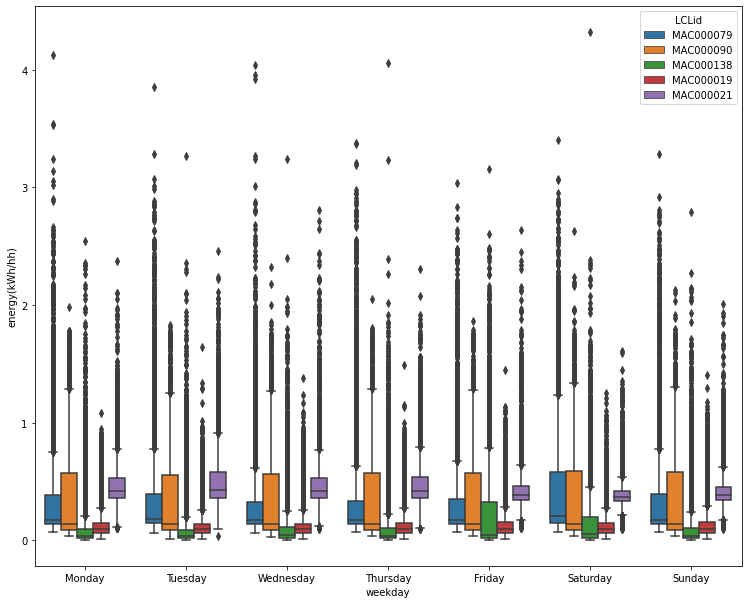

In [ ]:
## Ploting Weekday Boxplot for all households
sns.boxplot(x=data_all_new['weekday'], y=data_all_new['energy(kWh/hh)'], hue=data_all_new['LCLid'])

This helps us understand how frequently does each household uses energy on the daily.

It does seem that MAC00090 does use the most consistent amount of energy during the week. I find that kind of strange as it very uniform along the way. 

We can also see a lot of data that is away from the boxplot which indicates that there is a lot of outliers amogst each household. MAC000079 seems to be the one that has the most outliers out of all of them. Unfortunately, we cannot get the exact location of any household, but it can be infered that they may work at home a lot or have individuals not working a lot given they are affluent (the highest class in London). 

        

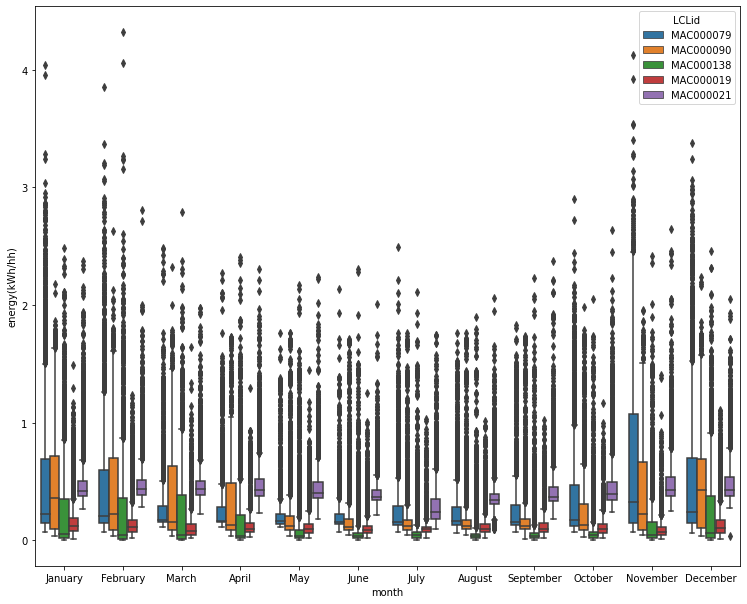

In [ ]:
## Ploting Month Boxplot for all households
sns.boxplot(x=data_all_new['month'], y=data_all_new['energy(kWh/hh)'], hue=data_all_new['LCLid'])

It is not suprising that winter would be the season that everyone uses the weather more often as London does have terrible winter weather. What I am amazed however is the amount of power they use during the summer, as it has significantly less high outliers than November, December, and January. It is a suprised that we can see that collectively November is the month that uses alot. 

In [ ]:
plt.show()

## Comparing Affluent and Adversity 

## Cumulative sum of each month visualized

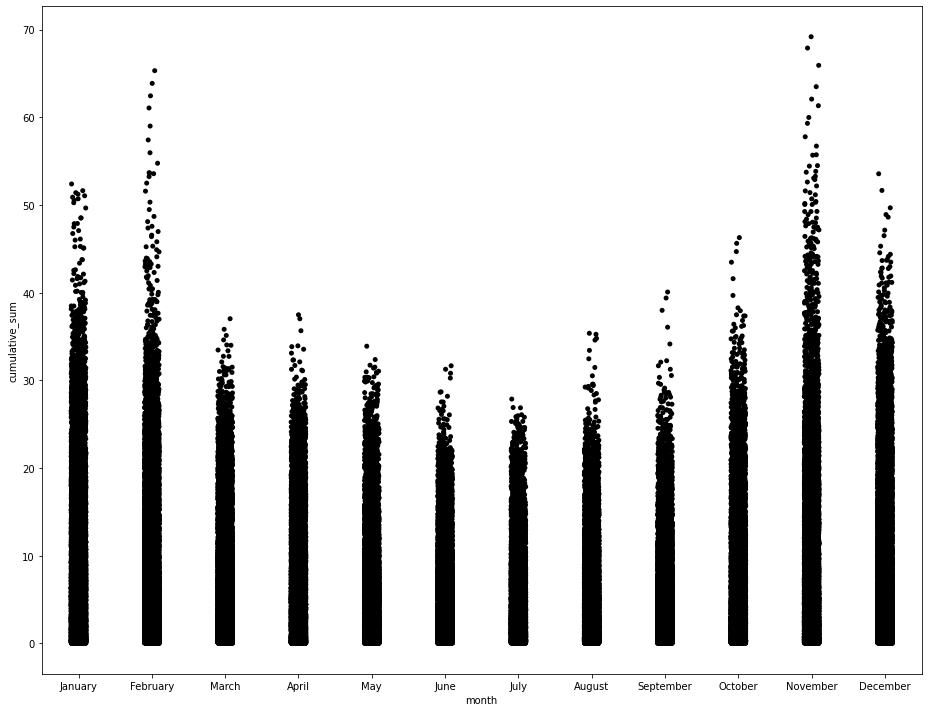

In [ ]:
fig, axs = plt.subplots(figsize=(13,10))
sns.stripplot(x='month', y='cumulative_sum', data=data_all_new, color='black')


Comparing this graph to the other, we can see that November is infact the most used month for in this given sample as a consensus. What is crazy however is the amount of energy used in Februrary as I expected for January or December to be second to November!

## Cumulative sum of each month visualized but seperated by household

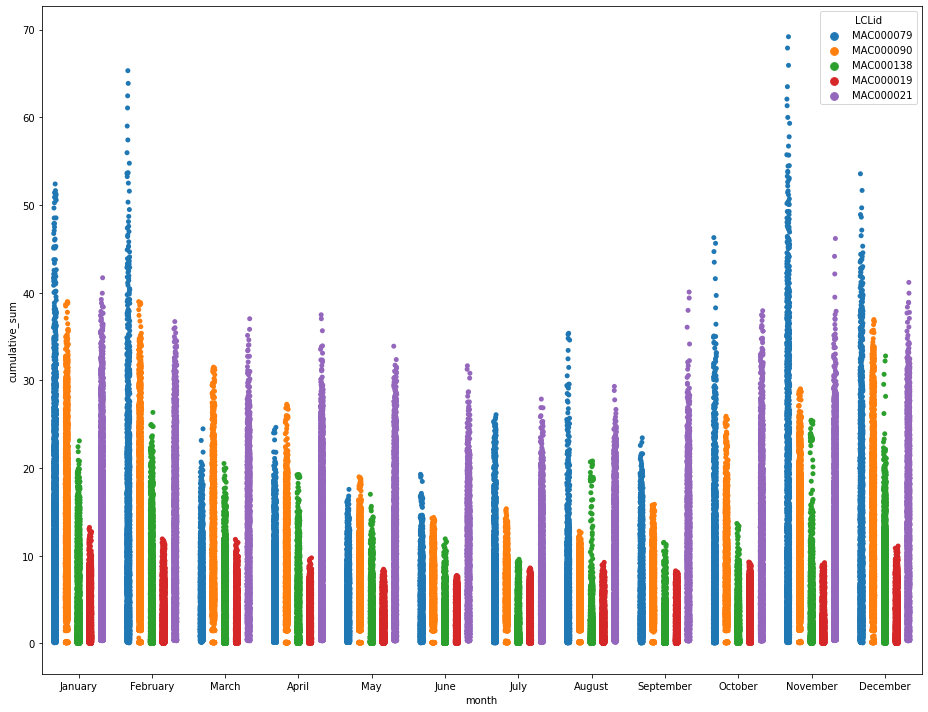

In [ ]:
fig, axs = plt.subplots(figsize=(13,10))
sns.stripplot(x='month', y='cumulative_sum',hue = 'LCLid', data=data_all_new, dodge = True)

## Usage of each household, hourly visualized

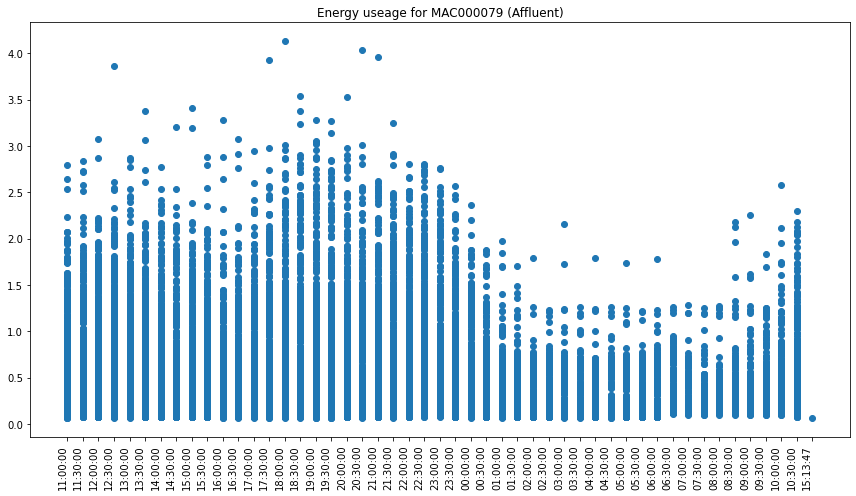

In [ ]:
fig, axs = plt.subplots(figsize=(12,7))
plt.scatter(x='time', y='energy(kWh/hh)', data=df8_merged)
plt.gcf().autofmt_xdate(rotation=90)
plt.title("Energy useage for MAC000079 (Affluent)")
fig.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

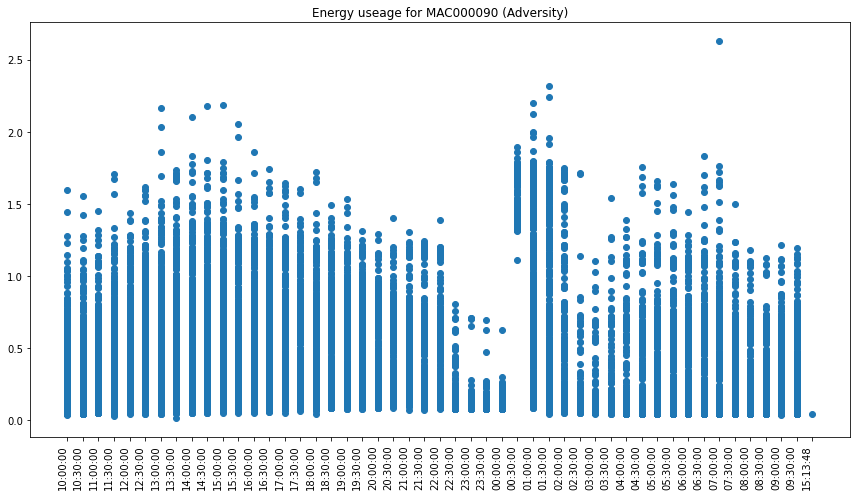

In [ ]:
fig, axs = plt.subplots(figsize=(12,7))
plt.scatter(x='time', y='energy(kWh/hh)', data=df104_merged)
plt.gcf().autofmt_xdate(rotation=90)
plt.title("Energy useage for MAC000090 (Adversity)")
fig.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

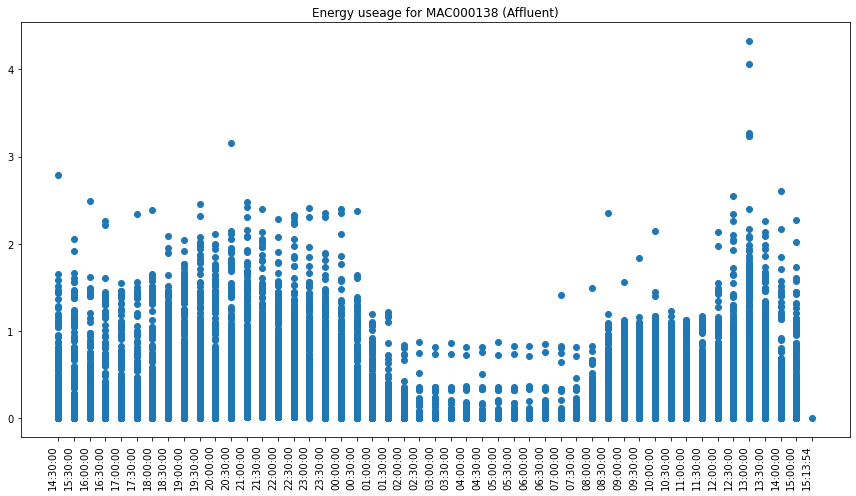

In [ ]:
fig, axs = plt.subplots(figsize=(12,7))
plt.scatter(x='time', y='energy(kWh/hh)', data=df21_merged)
plt.gcf().autofmt_xdate(rotation=90)
plt.title("Energy useage for MAC000138 (Affluent)")
fig.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

Out of the 5, this one is the one that I am not too sure why it is low. As this person it of course affluent and may not care entirely about how much money they spend (given they are in the richest acorn family). It would've great if we were given the approxmiate location or the job in each given household, but I understand if that would be too much. I still yet to question why is this so low.

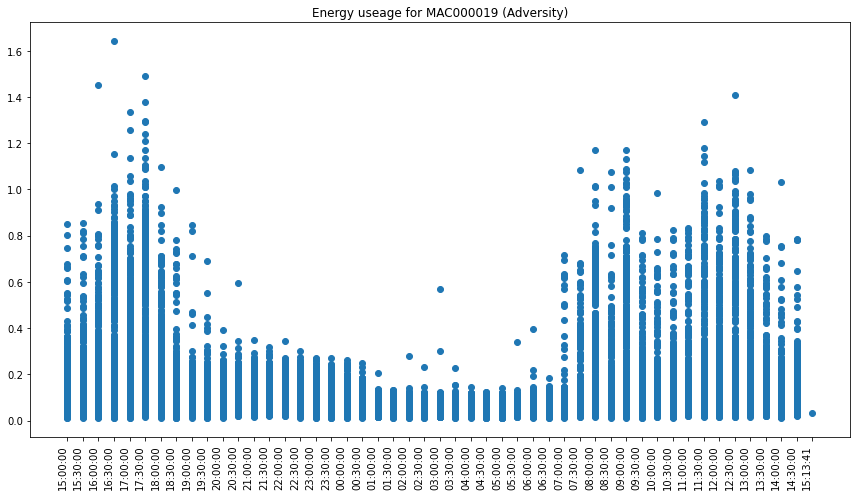

In [ ]:
fig, axs = plt.subplots(figsize=(12,7))
plt.scatter(x='time', y='energy(kWh/hh)', data=df76_merged)
plt.gcf().autofmt_xdate(rotation=90)
plt.title("Energy useage for MAC000019 (Adversity)")
fig.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

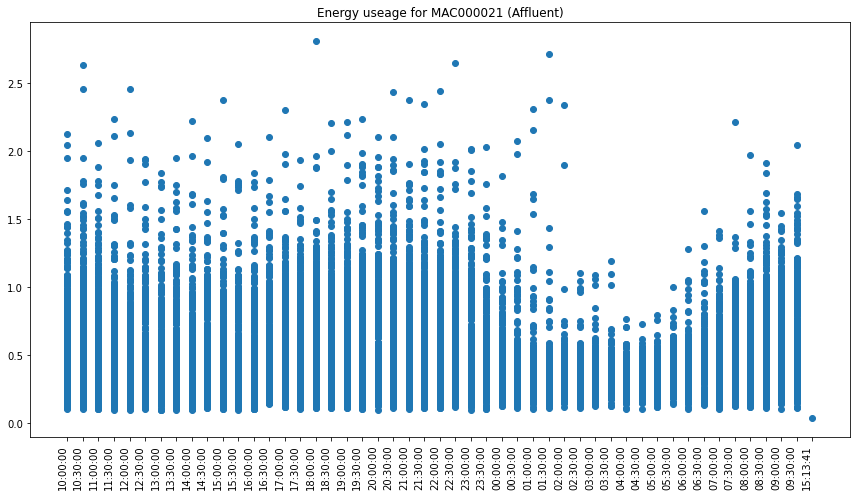

In [ ]:
fig, axs = plt.subplots(figsize=(12,7))
plt.scatter(x='time', y='energy(kWh/hh)', data=df37_merged)
plt.gcf().autofmt_xdate(rotation=90)
plt.title("Energy useage for MAC000021 (Affluent)")
fig.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

It is not suprising that Affluent will be more prone to spend more money at any given day, while adversity spends its energy much more conservatively as they are not as wealthy as the wealthiest acorn group (go figure). What is amazing however is the amount of energy MAC000019 uses from 21:00-7:00 since they managed to use significantly less energy compared to their other counterpart, and from the opposing group too. This gives the impression that they may not be as wealthy as MAC000090 since MAC000090 uses its energy much more liberaly as the affluent group. 

### Comparing the average of each household per day

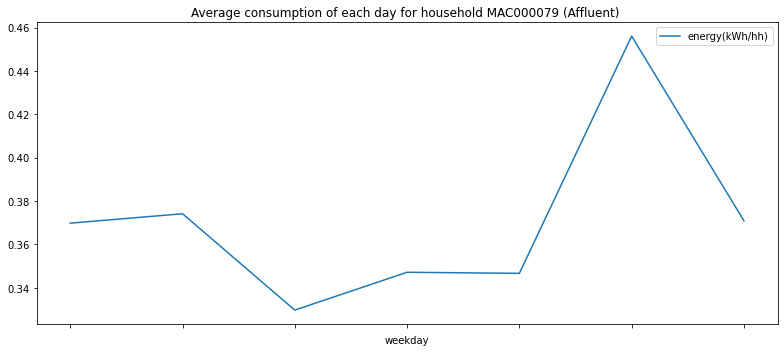

In [ ]:
df8_merged.groupby('weekday').mean().plot(y = 'energy(kWh/hh)',figsize = (11,5), title = "Average consumption of each day for household MAC000079 (Affluent) ")

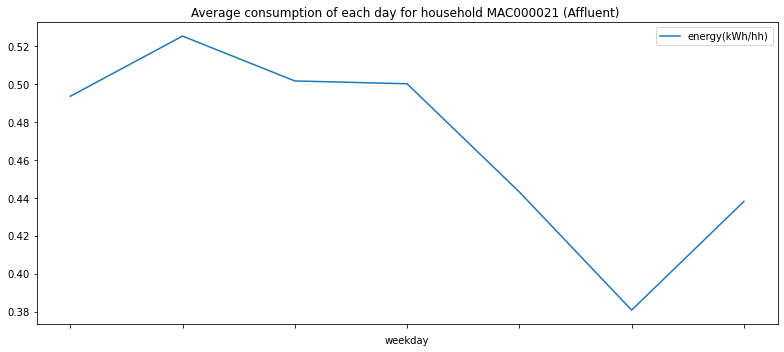

In [ ]:
df37_merged.groupby('weekday').mean().plot(y = 'energy(kWh/hh)', figsize = (11,5), title = "Average consumption of each day for household MAC000021 (Affluent) ")

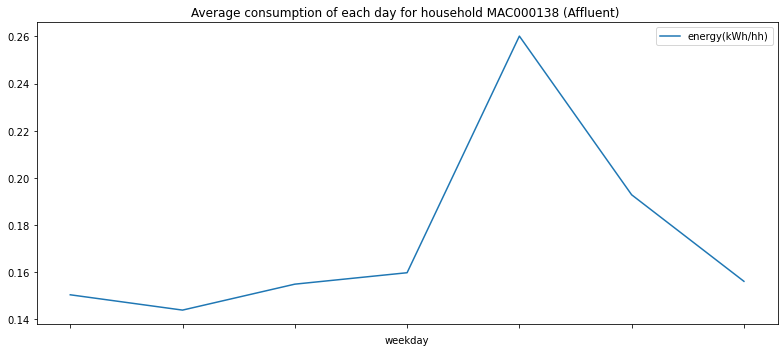

In [ ]:
df21.groupby('weekday').mean().plot(y = 'energy(kWh/hh)', figsize = (11,5), title = "Average consumption of each day for household MAC000138 (Affluent) ")

It is no secret that the affluent group will be more prone to use more energy as they are the ones that are wealthy. What does suprise me is the amount of energy used on the weekend for MAC000021 as they appear to be using the least amount of energy during the weekend. Perhaps they spend their weekend outside of thier home? Or perhaps they have important tasks to attend to during the weekend? What is also shocking is the usages of energy during monday to tuesday as I expected to be a busy day, but on average, it appears to be not be used for MAC000138 and MAC000079 compared to MAC000021's energy consumption. 

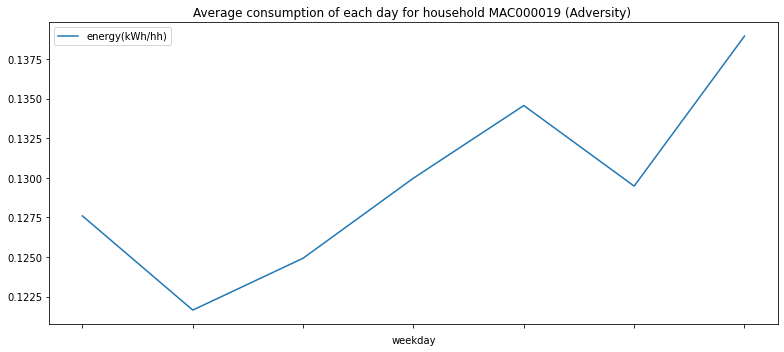

In [ ]:
df76.groupby('weekday').mean().plot(y = 'energy(kWh/hh)', figsize = (11,5), title = "Average consumption of each day for household MAC000019 (Adversity) ")

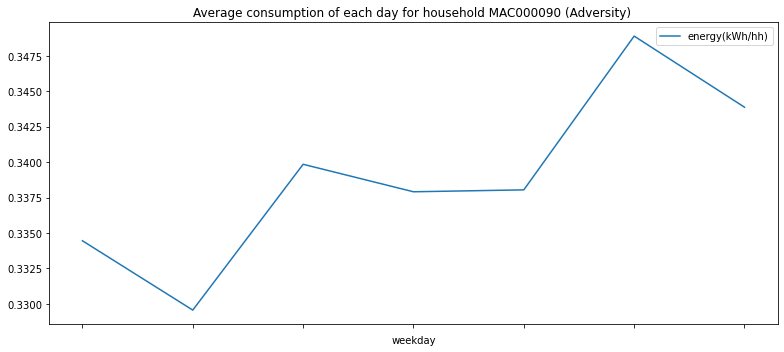

In [ ]:
df104.groupby('weekday').mean().plot(y = 'energy(kWh/hh)', figsize = (11,5), title = "Average consumption of each day for household MAC000090 (Adversity) ")

I find it interesting how saturday and sunday on both adversity household have different apporaches towards using their energy during the weekends. As well as how similar they use their energy from monday to tuesday. That is something that is worth noting from this. 

### In general graph of day

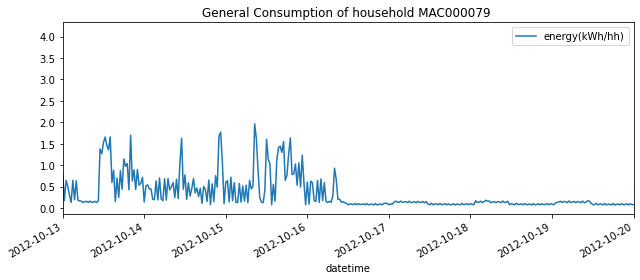

In [ ]:
df8.plot(y="energy(kWh/hh)", figsize=(9, 4), xlim=('2012-10-13', '2012-10-20'), title = "General Consumption of household MAC000079 ")

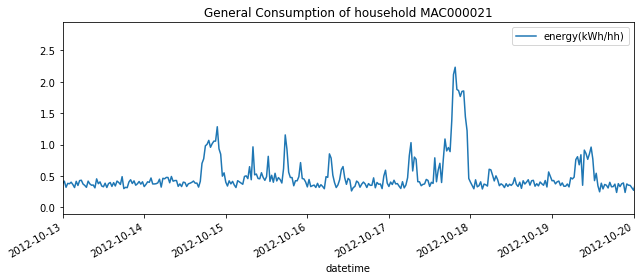

In [ ]:
df37.plot(y="energy(kWh/hh)", figsize=(9, 4), xlim=('2012-10-13', '2012-10-20'), title = "General Consumption of household MAC000021" )

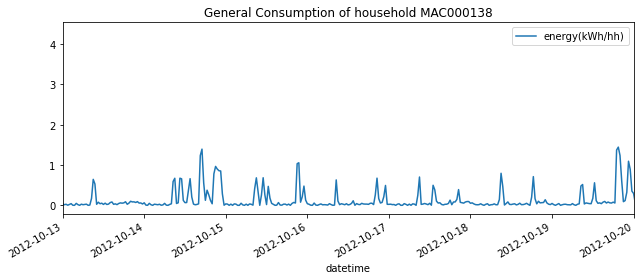

In [ ]:
df21.plot(y="energy(kWh/hh)", figsize=(9, 4), xlim=('2012-10-13', '2012-10-20'), title = "General Consumption of household MAC000138")

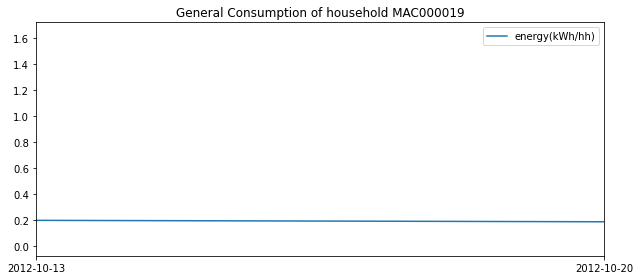

In [ ]:
df76.plot(y="energy(kWh/hh)", figsize=(9, 4), xlim=('2012-10-13', '2012-10-20'), title = "General Consumption of household MAC000019")

## I have no idea why it is like this and I cannot change it 

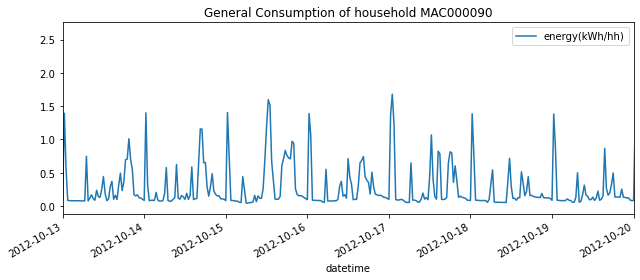

In [ ]:
df104.plot(y="energy(kWh/hh)", figsize=(9, 4), xlim=('2012-10-13', '2012-10-20'), title = "General Consumption of household MAC000090")

Here we have a timeline in which we can fully see the dips and lows of each respective time. It is quite amazing how each household varies, but there is a consensus that winter is the season where they use most of their energy. What I would've liked for this dataset is to provide us jobs of the household as it can be an interesting feature to predict or an indicator why some household uses more energy than another in a given time.